# 트리와 랜덤포레스트

트리 : 회귀와 분류 모두 사용적용가능한 비모수 지도학습방법
- 이해 및 해석력이 우수함   

##1. 결정트리 (분류문제)

■ 학습방향
노드 내의 데이터가 다양한 클래스에 얼마나 섞여 있는지를 측정하는 지표
- 지니 불순도 (0에서 1 사이의 값)
  1-0.5^2-0.5^2 = 0.5

- 크로스 엔트로피 (0에서 무한대까지의 값)
  -0.5*Log2(0.5)-0.5*Log2(0.5)
  = 0.5 + 0.5 = 1

In [63]:
''' 의사결정나무(분류) 모델 구축 및 학습 '''

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
features = iris.data
target = iris.target

''' 모델 구축 '''
# DecisionTreeClassifier의 default 불순도 지표는 지니 불순도(Gini impurity)이며,
# criterion에 다른 불순도 지표 적용 가능함

decisiontree = DecisionTreeClassifier(random_state = 0)
# decisiontree = DecisionTreeClassifier(criterion='entropy',random_state = 0)

''' 모델 학습 '''
model = decisiontree.fit(features, target)

In [64]:
''' 새로운 데이터 적용 '''
observation = [[5,4,3,2]]
# pred = model.predict(observation)
pred_proba = model.predict_proba(observation)
result = pd.DataFrame(pred_proba, columns=model.classes_)

display(result)

,0,1,2
0,0.0,1.0,0.0


## 2. 결정트리 (회귀문제)

In [65]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn import datasets

# # `load_boston` has been removed from scikit-learn since version 1.2.
# import sklearn
# print(sklearn.__version__)
# # 1.2.2

# boston = datasets.load_boston()
# display(boston)
# feature = boston.load[:,0:2]
# target = boston.target

# decisiontree_reg = DecisionTreeRegressor(random_state = 0)

# model = decisiontree_reg.fit(features,target)

In [66]:
''' 의사결정나무(회귀) 모델 구축 및 학습 '''
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# features = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
features = raw_df.values[1::2, :2]
target = raw_df.values[1::2, 2]


# decisiontree_reg = DecisionTreeRegressor(random_state = 0)
decisiontree_reg = DecisionTreeRegressor(criterion = "absolute_error", random_state = 0)
# among {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'}. Got 'mae' instead.

model_reg = decisiontree_reg.fit(features,target)

In [67]:
''' 새로운 데이터 적용 '''
observation_reg = [[0.02, 16]]
pred_reg = model_reg.predict(observation_reg)
pred_reg

array([13.5])

## 3. 모델 시각화
트리 모델을 시각화

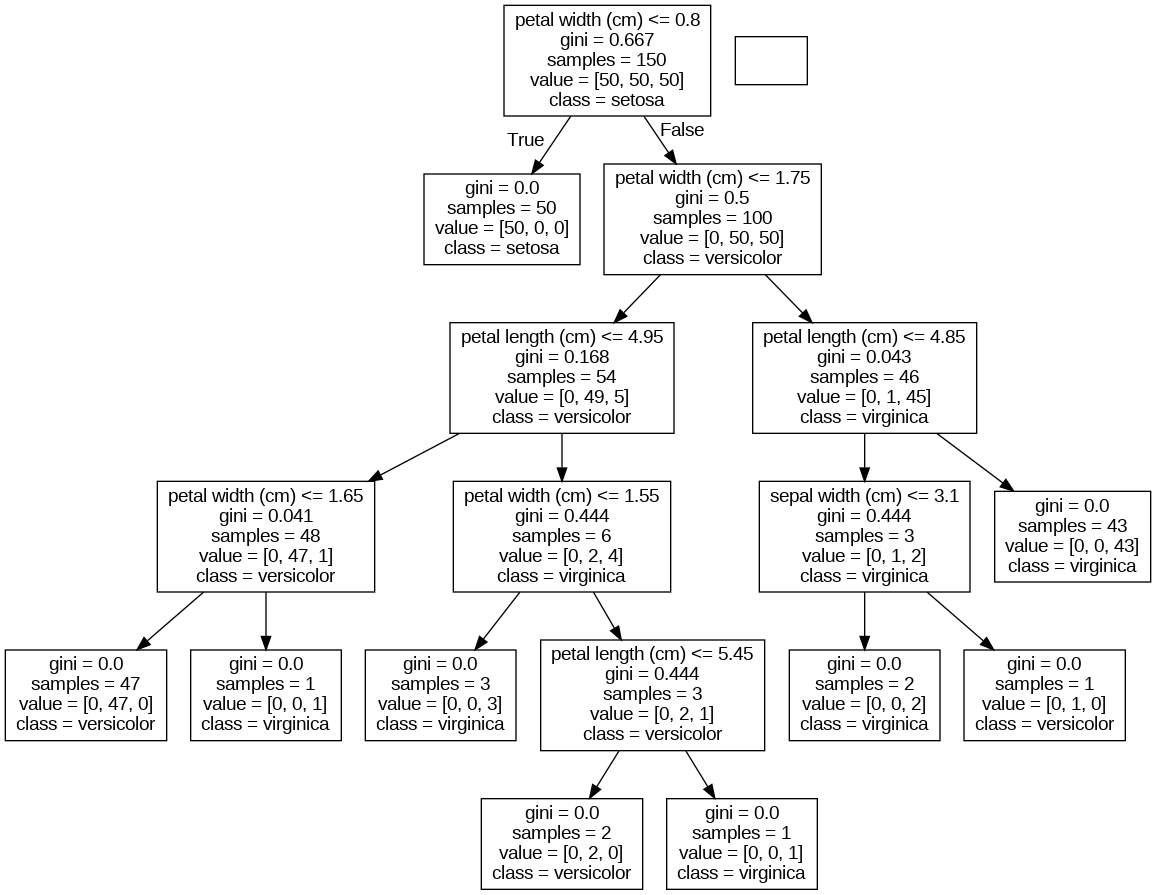

In [68]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris()
feature = iris.data
target = iris.target

''' 분류기 만들고, 훈련하기 '''
decisiontree = DecisionTreeClassifier(random_state = 0)
model = decisiontree.fit(feature, target)

''' DOT 데이터 만들기 '''
dot_data = tree.export_graphviz(decisiontree,
                                out_file = None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names)

''' 그리기 '''
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [69]:
graph.write_pdf("iris.pdf")
graph.write_png("iris.png")

True

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.3846153846

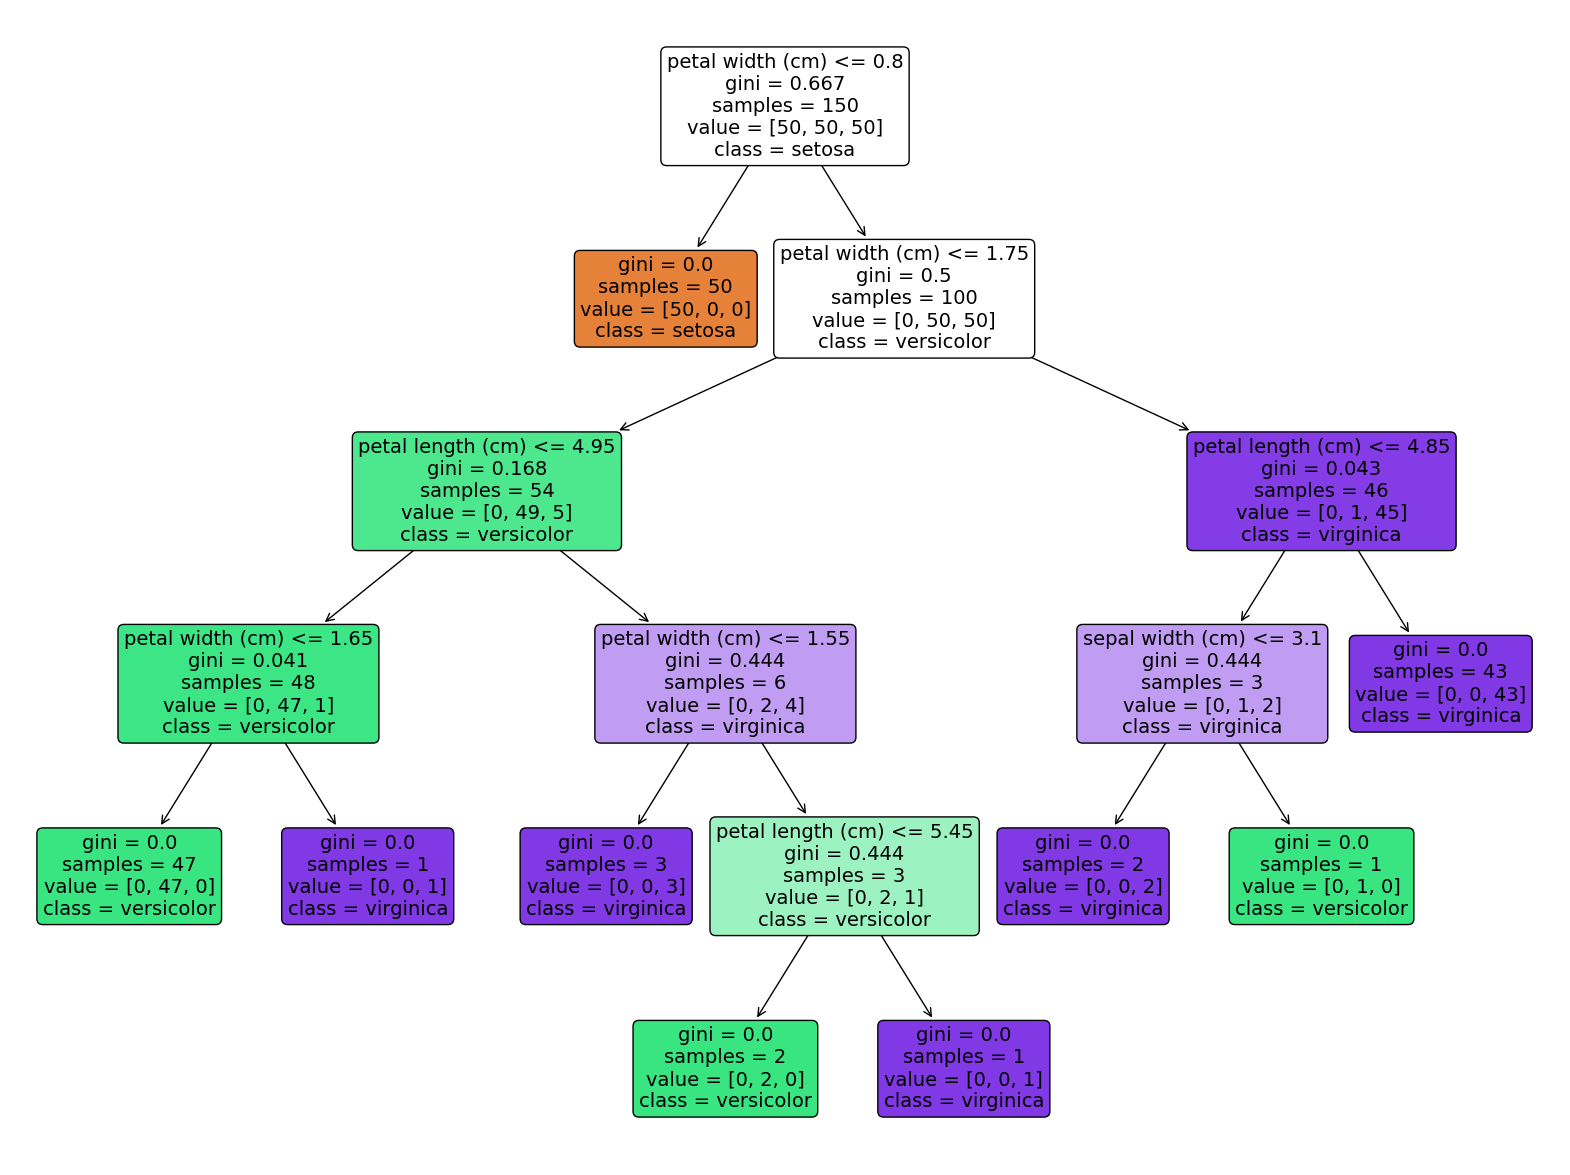

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(model, filled=True,
               feature_names = iris.feature_names,
               class_names = iris.target_names,
               rounded=True, fontsize=14)

## 4. 랜덤 포레스트 (분류)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
feature = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state = 0,n_jobs=-1)
model = randomforest.fit(feature, target)

randomforest_entropy = RandomForestClassifier(random_state = 0,n_jobs=-1)
model_entropy = randomforest_entropy.fit(feature, target)

print(randomforest.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [72]:
observation = [[5, 4, 3, 2]]
model.predict(observation)

array([1])

In [73]:
observation = [[5, 4, 3, 2]]
model_entropy.predict(observation)

array([1])

## 5. 랜덤 포레스트 (회귀)

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
feature = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

randomforest = RandomForestRegressor(random_state = 0,n_jobs=-1)
model = randomforest.fit(feature, target)

print(randomforest.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


## 6. Feature 중요도

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 9.0907954   2.45310412 46.04447396 42.41162651]


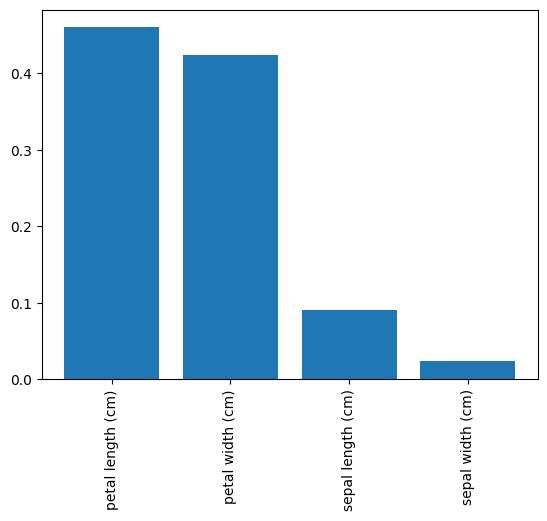

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
feature = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state = 0,n_jobs=-1)
model = randomforest.fit(feature, target)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [iris.feature_names[i] for i in indices]

print(iris.feature_names)
print(model.feature_importances_*100)

plt.figure()
plt.bar(range(feature.shape[1]),importances[indices])
plt.xticks(range(feature.shape[1]), names, rotation=90)
plt.show()

## 7. 중요한 특성 선택하기

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

iris = datasets.load_iris()
feature = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state = 0,n_jobs=-1)

''' threshold나 갯수로 설계 '''
# selector = SelectFromModel(randomforest, threshold = 0.3)
selector = SelectFromModel(model, threshold=-np.inf, max_features=3)
# threshold 매개변수는 특성을 선택하는 기준을 나타내며, -np.inf로 설정하면 중요도가 가장 높은 특성 3개를 선택합니다.
feature_important = selector.fit_transform(feature, target)
model = randomforest.fit(feature_important, target)

observation = [[5, 4, 3]]
model.predict(observation)

array([1])

## 8. 불균형한 클래스 다루기

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
feature = iris.data
target = iris.target

''' 처음 40개의 샘플을 제거하여 불균형한데이터 만들기 '''
feature = feature[40 : , :]
target = target[40:]

''' 0인 클랫 외 모든타겟 1로 만들기 '''
target = np.where((target == 0),0,1)


unique_values, value_counts = np.unique(target, return_counts=True)
print("고유한 값", unique_values[0],"의 개수:", value_counts[0] )
print("고유한 값", unique_values[1],"의 개수:", value_counts[1] )

randomforest = RandomForestClassifier(
    random_state = 0,n_jobs=-1, class_weight="balanced")
model = randomforest.fit(feature, target)

''' 많은 클라스의 가중치 '''
# 110 / (2*100) = 0.55
# 100 * 0.55 = 55

''' 작은 클라스의 가중치 '''
# 110 / (2*10) = 5.5
# 10 * 5.5 = 55

고유한 값 0 의 개수: 10
고유한 값 1 의 개수: 100


' 작은 클라스의 가중치 '

9. 트리 크기 제어하기

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0, #seed
                                      max_depth = None,
                                      # (기본값=None) 트리의 최대 깊이
                                      min_samples_split=2,
                                      # (기본값=2) 노드를 분할하기 위한 불순도 최소 감소량
                                      min_samples_leaf=1,
                                      # (기본값=1) 리프노드가 가져야 할 최소 샘플 수
                                      min_weight_fraction_leaf=0,
                                      # (기본값= 0) 리프 노드가 가져야 할 최소 가중치 비율
                                      max_features=None,
                                      # (기본값=None)각 분할에서 고려할 최대 feature 개수
                                      max_leaf_nodes=None,
                                      # (기본값=None) 트리에 생성될 최대 리프 노드의 수
                                      min_impurity_decrease=0,
                                      # (기본값=0) 분할하기 위한 불순도 감소 기준
                                      class_weight=None)
                                      # (기본값=None) 클래스 가중치

model = decisiontree.fit(features, target)

## 10. 부스팅
- 약한 학습기를 결합하여 강력한 학습기를 생성하는 알고리즘

- 이전 학습기가 잘못 분류한 샘플에 높은 가중치를 부여하여 오류를 보정

- AdaBoost (Adaptive Boosting): 오차의 가중치를 조절
- Gradient Boosting, XGBoost, LightGBM, CatBoost: 오차를 보정하는 방법, 잔여오차에 새로운 트리를 훈련하는 방식
- Stochastic Gradient Boosting (SGDBoost)

In [79]:
''' AdaBoostClassifier '''

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target


adaboost = AdaBoostClassifier(random_state = 0)
model = adaboost.fit(features, target)

# AdaBoostClassifier : 깊이가 1인 트리
# AdaBoostRegressor : 깊이가 3인 트

In [80]:
''' GradientBoostingClassifier '''
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier(random_state=0)
model = gradientboost.fit(features, target)

In [81]:
''' GradientBoostingClassifier '''
# 히스토그램 기반의 그래디언트부스팅
# 훈련 데이터를 정수구간으로 변환 후 훈련하기 때문에 속도가 빠름

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

histgradientboost = HistGradientBoostingClassifier(random_state=0)
model = histgradientboost.fit(features, target)

## 11. OOB로 랜덤포레스트 평가하기

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

randomforest = RandomForestClassifier(random_state = 0,
                                      n_estimators = 1000,
                                      oob_score=True,
                                      n_jobs=-1)
model = randomforest.fit(features, target)
randomforest.oob_score_

0.9533333333333334

In [83]:
''' 부트스트랩 샘플링을 사용하는 배깅에 OOB 구현/검증 '''
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

bagging = BaggingClassifier(DecisionTreeClassifier(),
                            random_state = 0,
                            n_estimators = 1000,
                            oob_score=True,
                            n_jobs=-1)

model = bagging.fit(features, target)
model.oob_score_

0.96